## **Insurance Policy Analysis Project**

#### **Background:**
This insurance policy analysis project aims to explore and analyze data related to insurance policies. Insurance is an industry that is critical in protecting individuals and companies from unforeseen financial risks. In this project, we will extract information from an insurance policies dataset that includes variables such as ID, date of birth, marital status, car usage, gender, number of children driving, education, car make, car model, car color, car year, frequency of claims, zone of coverage, number of claims, and household income.

The dataset used is a collection of insurance policies data which contains information related to insurance policies. This dataset includes various variables that reflect customer profiles and information related to insurance claims. This dataset is arranged in a structured format and ready for analysis.

#### **Purpose of Analysis:**
The main objective of this analysis is to gain insight and deeper understanding of insurance policies, including claim patterns, customer characteristics, and factors that influence insurance claims. This analysis will include the use of descriptive statistical analysis methods, data visualization, and possibly also the application of predictive models. Several research questions that will be answered through this analysis include:

1. What is the average age of the customer (provide mean and median)? Does age number affect the number of claims filed?
2. Is there a relationship between car use, gender, and the number of children driving and the frequency of insurance claims?
3. How is the distribution of the number of claims and the average number of claims by coverage zone? and so on.

By analyzing this dataset, it is hoped that we can gain valuable insights that can support insurance decision-making and assist in the development of strategies that are more effective in managing risk.

In [ ]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set adjustment for any visualization
sns.set_style('white')

In [ ]:
# Load data
data = pd.read_csv('Insurance Policies.csv')
data

,ID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,car_make,car_model,car_color,car_year,claim_freq,coverage_zone,claim_amt,household_income
0,62-2999778,8/9/1962,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,$73759.88,$220436.66
1,70-2426103,4/21/1988,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,$78975.41,$66491.43
2,08-3808219,3/8/1999,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,$30904.01,$56122.70
3,38-0306843,5/10/1959,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,$30257.82,$175182.61
4,47-5163637,1/15/1992,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,$50434.02,$137110.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37537,76-9636930,12/21/1963,Single,Private,Female,0,No,High School,Audi,S4,Fuscia,2000,2,Urban,$36023.32,$126360.31
37538,70-8201812,8/6/1957,Seperated,Commercial,Female,0,No,Bachelors,GMC,3500,Maroon,1997,0,Highly Rural,$83220.69,$180571.33
37539,14-7596380,10/23/1950,Divorced,Private,Female,0,No,PhD,Chevrolet,Camaro,Turquoise,1974,1,Highly Rural,$9515.35,$144296.53
37540,72-6900872,4/19/1976,Single,Private,Female,0,Yes,Masters,Jaguar,XJ Series,Pink,2003,0,Urban,$56333.58,$117245.10


In [ ]:
# Checking if data has duplicate or NaN values
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
  print('No duplicate data')
else:
  print('Duplicate data found:')
  print(duplicate_rows)

missing_data = data.isnull().sum()
if missing_data.sum() == 0:
  print('No NaN or missing data')
else:
  print('NaN or missing data found:')
  print(missing_data)

No duplicate data
No NaN or missing data


In [ ]:
data = data.dropna().copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37542 entries, 0 to 37541
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                37542 non-null  object
 1   birthdate         37542 non-null  object
 2   marital_status    37542 non-null  object
 3   car_use           37542 non-null  object
 4   gender            37542 non-null  object
 5   kids_driving      37542 non-null  int64 
 6   parent            37542 non-null  object
 7   education         37542 non-null  object
 8   car_make          37542 non-null  object
 9   car_model         37542 non-null  object
 10  car_color         37542 non-null  object
 11  car_year          37542 non-null  int64 
 12  claim_freq        37542 non-null  int64 
 13  coverage_zone     37542 non-null  object
 14  claim_amt         37542 non-null  object
 15  household_income  37542 non-null  object
dtypes: int64(3), object(13)
memory usage: 4.6+ MB


In [ ]:
# Reformat some data type format from these following columns
data['birthdate'] = pd.to_datetime(data['birthdate'], dayfirst=True)
data['car_year'] = data['car_year'].astype(str)
data['claim_amt'] = data['claim_amt'].str.replace('$', '').astype(float)
data['household_income'] = data['household_income'].str.replace('$', '').astype(float)

print(data.dtypes)

<ipython-input-6-ddfa2b306480>:2: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['birthdate'] = pd.to_datetime(data['birthdate'], dayfirst=True)


ID                          object
birthdate           datetime64[ns]
marital_status              object
car_use                     object
gender                      object
kids_driving                 int64
parent                      object
education                   object
car_make                    object
car_model                   object
car_color                   object
car_year                    object
claim_freq                   int64
coverage_zone               object
claim_amt                  float64
household_income           float64
dtype: object


<ipython-input-6-ddfa2b306480>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['claim_amt'] = data['claim_amt'].str.replace('$', '').astype(float)
<ipython-input-6-ddfa2b306480>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['household_income'] = data['household_income'].str.replace('$', '').astype(float)


In [ ]:
# Change some column names for easier understanding
new_columns = {'ID': 'numberID',
               'car_make': 'brand',
               'car_model': 'model',
               'car_color': 'color',
               'car_year': 'produce_year'}
data = data.rename(columns=new_columns)

In [ ]:
# Checking unique values from these following variables
print(data['marital_status'].unique())
print(data['car_use'].unique())
print(data['education'].unique())
print(data['coverage_zone'].unique())

['Single' 'Married' 'Divorced' 'Seperated']
['Private' 'Commercial']
['High School' 'Bachelors' 'Masters' 'PhD']
['Highly Urban' 'Urban' 'Rural' 'Highly Rural' 'Suburban']


In [ ]:
# Group several unique values above into new category, then put them into data
marital_dict = {
    'Single': 'Individual',
    'Married': 'Pair',
    'Divorced': 'Individual',
    'Seperated': 'Individual'
}

edu_dict = {
    'High School': 'Basic Education',
    'Bachelors': 'Advanced Education',
    'Masters': 'Advanced Education',
    'PhD': 'Advanced Education'
}

cover_zone_dict = {
    'Highly Urban': 'Urban',
    'Urban': 'Urban',
    'Rural': 'Rural',
    'Highly Rural': 'Rural',
    'Suburban': 'Suburban'
}

data['marital_status_new'] = data['marital_status'].apply(lambda x: marital_dict[x])
data['education_level'] = data['education'].apply(lambda x: edu_dict[x])
data['covered_area'] = data['coverage_zone'].apply(lambda x: cover_zone_dict[x])
data

,numberID,birthdate,marital_status,car_use,gender,kids_driving,parent,education,brand,model,color,produce_year,claim_freq,coverage_zone,claim_amt,household_income,marital_status_new,education_level,covered_area
0,62-2999778,1962-09-08,Single,Private,Male,2,Yes,High School,Acura,TSX,Green,2010,1,Highly Urban,73759.88,220436.66,Individual,Basic Education,Urban
1,70-2426103,1988-04-21,Married,Private,Female,0,No,Bachelors,Corbin,Sparrow,Turquoise,2004,1,Urban,78975.41,66491.43,Pair,Advanced Education,Urban
2,08-3808219,1999-08-03,Divorced,Private,Male,0,No,Bachelors,Nissan,Pathfinder,Orange,1993,0,Rural,30904.01,56122.70,Individual,Advanced Education,Rural
3,38-0306843,1959-10-05,Single,Private,Female,0,No,Bachelors,Ford,Econoline E350,Pink,2000,1,Highly Urban,30257.82,175182.61,Individual,Advanced Education,Urban
4,47-5163637,1992-01-15,Single,Commercial,Male,0,No,Masters,Nissan,350Z,Green,2006,3,Rural,50434.02,137110.23,Individual,Advanced Education,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37537,76-9636930,1963-12-21,Single,Private,Female,0,No,High School,Audi,S4,Fuscia,2000,2,Urban,36023.32,126360.31,Individual,Basic Education,Urban
37538,70-8201812,1957-06-08,Seperated,Commercial,Female,0,No,Bachelors,GMC,3500,Maroon,1997,0,Highly Rural,83220.69,180571.33,Individual,Advanced Education,Rural
37539,14-7596380,1950-10-23,Divorced,Private,Female,0,No,PhD,Chevrolet,Camaro,Turquoise,1974,1,Highly Rural,9515.35,144296.53,Individual,Advanced Education,Rural
37540,72-6900872,1976-04-19,Single,Private,Female,0,Yes,Masters,Jaguar,XJ Series,Pink,2003,0,Urban,56333.58,117245.10,Individual,Advanced Education,Urban


In [ ]:
# Eliminate columnns that are no longer in use
data_clean = data.drop(['marital_status', 'education', 'coverage_zone'], axis=1)

In [ ]:
# Checking statistical view in our data
print(data_clean.describe())
print(data_clean.head())

       kids_driving    claim_freq     claim_amt  household_income
count  37542.000000  37542.000000  37542.000000      37542.000000
mean       0.418278      0.510308  50028.514096     147247.407750
std        0.736958      1.015050  28706.517988      59145.588886
min        0.000000      0.000000      0.040000      45004.910000
25%        0.000000      0.000000  25439.407500      96162.182500
50%        0.000000      0.000000  49455.890000     146674.895000
75%        1.000000      1.000000  74974.927500     198277.420000
max        3.000000      4.000000  99997.700000     249991.110000
     numberID  birthdate     car_use  gender  kids_driving parent   brand  \
0  62-2999778 1962-09-08     Private    Male             2    Yes   Acura   
1  70-2426103 1988-04-21     Private  Female             0     No  Corbin   
2  08-3808219 1999-08-03     Private    Male             0     No  Nissan   
3  38-0306843 1959-10-05     Private  Female             0     No    Ford   
4  47-5163637 1992-01

### **Analyze Process**

1. **What is the average age of the customer (provide mean and median)? Does age number affect the number of claims filed? If so, show the correlation!**

<ipython-input-12-b41280cf7935>:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  polis['age'] = (pd.to_datetime('now') - polis['birthdate']).astype('<m8[Y]')



Correlation between customer age and claim ammount:
0.0022514435320322547
Age mean: 46.54610835863833
Age median: 47.0


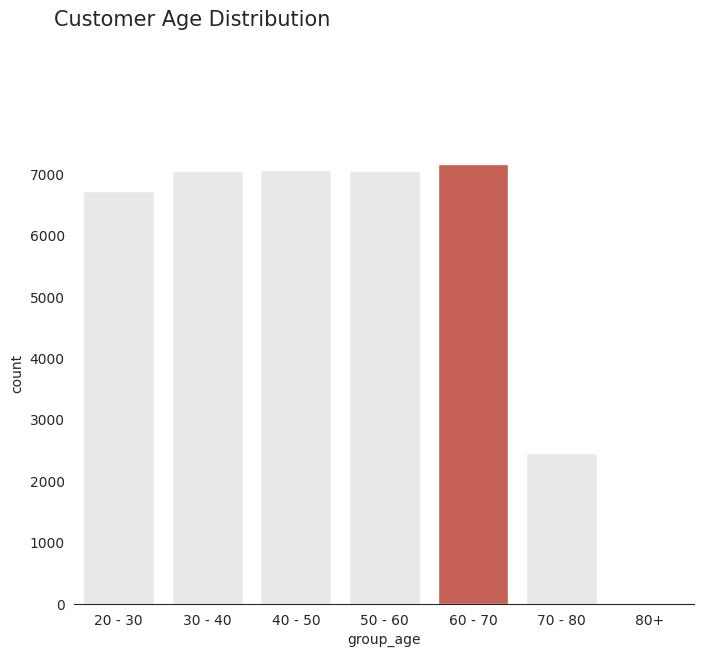

In [ ]:
# First wee need to grouping age number from each customer
polis = data_clean.copy()

polis['age'] = (pd.to_datetime('now') - polis['birthdate']).astype('<m8[Y]')
def group_age(age):
    if age < 30:
        return '20 - 30'
    elif age < 40:
        return '30 - 40'
    elif age < 50:
        return '40 - 50'
    elif age < 60:
        return '50 - 60'
    elif age < 70:
        return '60 - 70'
    elif age < 80:
        return '70 - 80'
    return '80+'

polis['group_age'] = polis['age'].apply(group_age)
# Finding out the average customer age, median and also calculate
# the correlation between age and claim ammount

# Define variables
title = 'Customer Age Distribution'
color = ['#E8E8E8',
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#D75341', 
          '#E8E8E8', 
          '#E8E8E8']

# Define the desired order of age ranges
age_ranges = ['20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80+']

# Convert 'group_age' to categorical data type with the desired order
polis['group_age'] = pd.Categorical(polis['group_age'], categories=age_ranges, ordered=True)

# Define plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=polis,
              x='group_age',
              palette=color)
fig.suptitle(title,
            x=0.1,
            y=1.1,
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=15)
sns.despine(left=True)
print()
age_mean = polis['age'].mean()
age_median = polis['age'].median()

# Idnetify correlation value
correlation = polis[['age', 'claim_amt']].corr().iloc[0, 1]
print("Correlation between customer age and claim ammount:")
print(correlation)
print(f'Age mean: {age_mean}')
print(f'Age median: {age_median}')

There is no strong correlation between the customer's age (by date of birth) and the number of claims filed. With 0.002269534913832814 indicates the weak relationship and there is no significant correlatio between these two variables. In addition, the mean and median ages give an idea of the age distribution of the customers in your dataset.

2. **What is the relationship between car ownership (personal/commercial) and the number of claims filed?**


Chi-square test result:
Chi-Square Statistic: 0.0
P-Value: 1.0
Degrees of freedom: 0
Expected Frequencies: [[ 7482.]
 [30060.]]


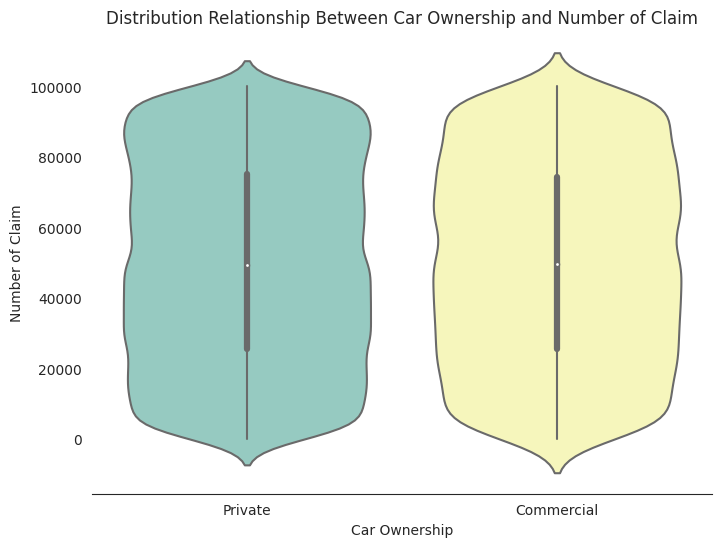

In [ ]:
# To answer this question we are going to use chi-square test method
# Load module
from scipy.stats import chi2_contingency

# Define independent and dependent variables
car_ownership = polis['car_use']
claim = polis['claim_amt']

# Using the chi-square test to test the relationship 
# between car ownership and the number of claims
pivot_table = pd.pivot_table(polis,
                             values='claim_amt',
                             index=car_ownership,
                             aggfunc='count')

chi2_stat, p_value, dof, expected = chi2_contingency(pivot_table)
print("\nChi-square test result:")
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of freedom:", dof)
print("Expected Frequencies:", expected)

# Plot to better understanding of distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(data=polis, x='car_use', y='claim_amt', palette='Set3')
ax.set_xlabel('Car Ownership')
ax.set_ylabel('Number of Claim')
ax.set_title('Distribution Relationship Between Car Ownership and Number of Claim')
sns.despine(left=True)
plt.show()


Based on the results of the chi-square test that we run, the following information is obtained:

1. Chi-Square Statistics: The resulting chi-square value is 0.0. This shows that there is no significant difference between car ownership (personal/commercial) and the number of claims filed.

2. P-Value: The p-value obtained is 1.0. The P-value is a measure of statistical significance. In this case, a high p-value indicates that there is insufficient evidence to reject the null hypothesis. In other words, there is no significant relationship between car ownership and the number of claims filed.

3. Degrees of Freedom: In this case, the degrees of freedom are 0. This indicates that there are no interrelated columns or rows in the contingency table.

4. Expected Frequencies: The expected frequencies matrix shows the expected frequencies if there is no relationship between car ownership and the number of claims. In this case, the value is 7482 for private car ownership and 30060 for commercial car ownership.

Thus, the results of the chi-square test show that there is no significant relationship between car ownership (personal/commercial) and the number of claims filed. This means that car ownership (personal/commercial) does not seem to affect the number of claims reported


3. **How is the distribution of brand car makes and models in the dataset?Is there a significant relationship with the number of claims, for example the effect of causing a high number of claims**

In [ ]:
# To answer question above we tend use the descriptive analysis
# Create and display frequency table for brand distribution
merk_count = polis['brand'].value_counts()
print('Frequency Table Brand:')
print(merk_count)

# Create and display frequency table for model distribution
model_count = polis['model'].value_counts()
print('Frequency Table Model:')
print(model_count)


Frequency Table Brand:
Ford          3302
Chevrolet     2954
Dodge         1843
Toyota        1809
GMC           1751
              ... 
MG               5
Fillmore         5
Rambler          5
Hillman          3
Fairthorpe       2
Name: brand, Length: 78, dtype: int64
Frequency Table Model:
Grand Prix            250
Corvette              235
Mustang               231
Camaro                174
Town Car              165
                     ... 
JX                      2
Sixty Special           2
Silverado Hybrid        1
Crossfire Roadster      1
Civic GX                1
Name: model, Length: 1011, dtype: int64


Tabel Jumlah Klaim berdasarkan Merek Mobil:
brand
Ford          1.655833e+08
Chevrolet     1.478564e+08
Dodge         9.291236e+07
Toyota        9.016172e+07
GMC           8.739633e+07
                  ...     
Merkur        2.217741e+05
Fillmore      2.014230e+05
Fairthorpe    1.151804e+05
Renault       9.835543e+04
Rambler       8.301884e+04
Name: claim_amt, Length: 78, dtype: float64


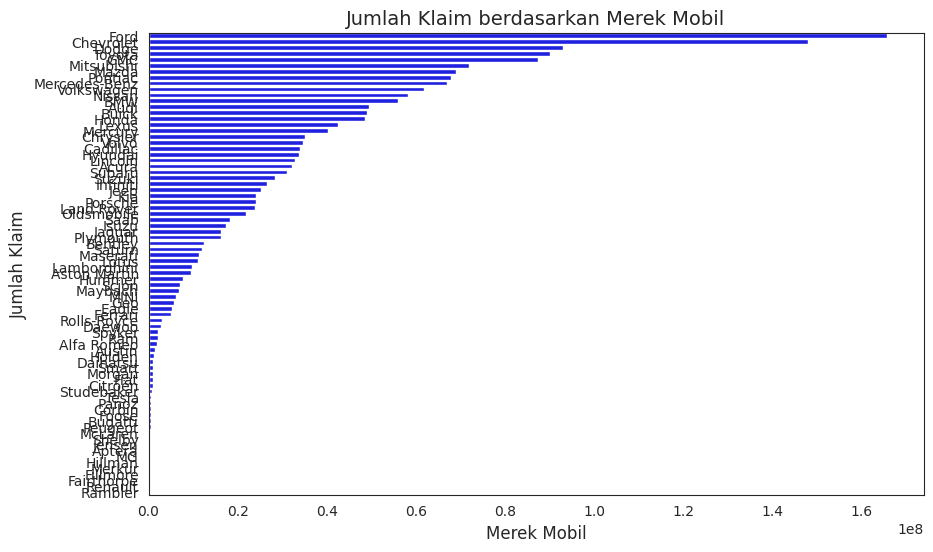


Hasil Uji ANOVA:
F-Statistic: 1.18087738204329
P-Value: 0.13294131363141856


In [ ]:
# Menghitung jumlah klaim berdasarkan merek mobil
claim_by_brand = polis.groupby('brand')['claim_amt'].sum().sort_values(ascending=False)

# Menampilkan tabel jumlah klaim berdasarkan merek mobil
print("Tabel Jumlah Klaim berdasarkan Merek Mobil:")
print(claim_by_brand)

# Membuat visualisasi diagram batang untuk jumlah klaim berdasarkan merek mobil
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=claim_by_brand.values,
            y=claim_by_brand.index,
            ax=ax,
            color='blue')
ax.set_xlabel('Merek Mobil', fontsize=12)
ax.set_ylabel('Jumlah Klaim', fontsize=12)
ax.set_title('Jumlah Klaim berdasarkan Merek Mobil', fontsize=14)
#plt.xticks(rotation=45)
plt.show()

# Melakukan uji hipotesis (misalnya, uji ANOVA) untuk menentukan apakah ada perbedaan yang signifikan dalam jumlah klaim antara merek mobil
# Misalnya, menggunakan uji ANOVA dari library scipy.stats
import scipy.stats as stats

brand_groups = []
for brand in polis['brand'].unique():
    brand_groups.append(polis.loc[polis['brand'] == brand, 'claim_amt'])

f_stat, p_value = stats.f_oneway(*brand_groups)

print("\nHasil Uji ANOVA:")
print("F-Statistic:", f_stat)
print("P-Value:", p_value)


The insight that can be drawn from these results is that based on the statistical analysis performed, no significant relationship was found between the factors tested (eg factors that can cause the number of claims to increase) and the number of claims submitted.


4. **Is there a difference in the number of claims between families with one child and families with more than one child driving a car?**

In [ ]:
# To answer this question
# Separate data into two group of family
one_kid = polis[polis['kids_driving'] == 1]['claim_amt']
more_one_kid = polis[polis['kids_driving'] > 1]['claim_amt']

# Conduct t-test
t_statistic, p_value = stats.ttest_ind(one_kid, more_one_kid)

# Display result
print('Independent t-test result:')
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


Independent t-test result:
T-Statistic: -1.2889335777925215
P-Value: 0.19744864663046444


A negative score on the T-Statistics indicates that the "One Child" group tends to have a lower claim average than the "More Than One Child" group. However, the p-value obtained is 0.1974 indicating the probability that the differences observed in the sample may occur randomly. A high P-value (above the assigned level of significance) indicates that the difference in mean claims between the “One Child” and “More Than One Child” groups is not statistically significant.

There is insufficient evidence to conclude that there is a significant difference in the number of claims between families with one child and families with more than one child.


5. **What is the relationship between marital status and household income? Is there a correlation between these 2 variables? and is there a significant relationship from each of these variables to the number of claims?**


Average Income Based on Marriage Category:
  marital_status_new  household_income
0         Individual     147212.951258
1               Pair     147315.860216

Category with the highest income:
Category: marital_status_new             Pair
household_income      147315.860216
Name: 1, dtype: object


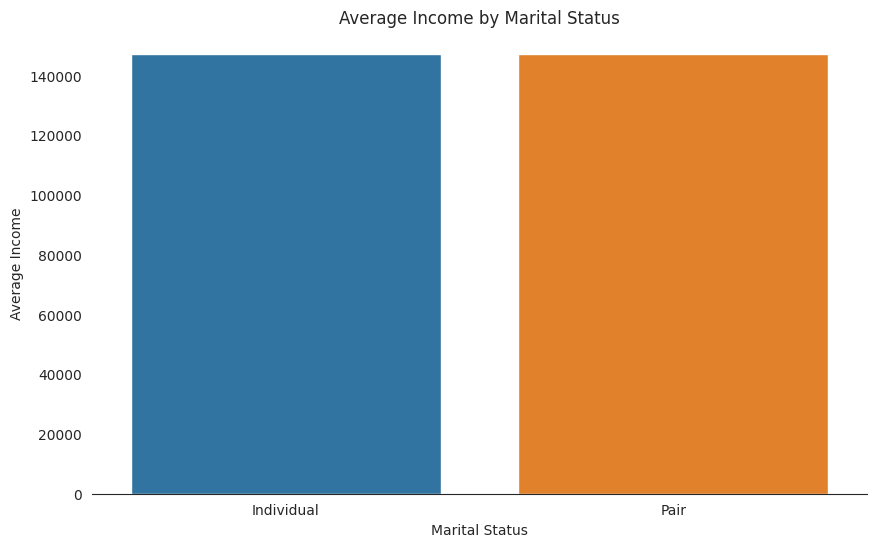

In [ ]:
# To check which group that has highest income in terms of marriage status
# Convert data type first
polis['household_income'] = pd.to_numeric(polis['household_income'], errors='coerce')

# Calculates average income by marital status group
average_income_by_marital_status = polis.groupby('marital_status_new')['household_income'].mean().reset_index()

# Determine the group with the highest income
highest_group = average_income_by_marital_status.loc[average_income_by_marital_status['household_income'].idxmax()]

# Display result
print("Average Income Based on Marriage Category:")
print(average_income_by_marital_status)
print("\nCategory with the highest income:")
print("Category:", highest_group)

# Display into bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=average_income_by_marital_status,
            x='marital_status_new',
            y='household_income')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.title('Average Income by Marital Status')
sns.despine(left=True)
plt.show()

In [ ]:
# Finding the correlation
marital_income = polis.drop(['numberID', 'birthdate',
                             'car_use', 'gender',
                             'kids_driving', 'parent',
                             'brand', 'model',
                             'color', 'produce_year',
                             'claim_freq', 'education_level',
                             'covered_area', 'age', 'group_age'], axis=1)

marital_income['marital_status_new'] = marital_income['marital_status_new'].replace({'Individual': 0, 'Pair': 1})

# Identify correlation between marital_status and household_income using Pearson method
correlation = marital_income['marital_status_new'].corr(marital_income['household_income'])
print('Correlation between marital status and household income:', correlation)

Correlation between marital status and household income: 0.0008211329925418917


In [ ]:
# Now let's see the relationship using regression linear model
import statsmodels.api as sm

# adding constant column
marital_income['intercept'] = 1

# Create model 
model = sm.OLS(marital_income['claim_amt'], marital_income[['intercept', 'marital_status_new', 'household_income']])
result = model.fit()

# Mencetak hasil ringkasan model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              claim_amt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.511
Date:                Wed, 24 May 2023   Prob (F-statistic):              0.221
Time:                        06:25:45   Log-Likelihood:            -4.3863e+05
No. Observations:               37542   AIC:                         8.773e+05
Df Residuals:                   37539   BIC:                         8.773e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept           5.021e+04    411

For the highest marital status group, on average, it is in the Pair (married, together) group with a value of 147315.860216. Then also obtained a correlation value that is very close to the number 0, between these 2 variables where the value is 0.0008211329925418917 where there is no significant correlation between these 2 variables. In other words, marital status is not a major factor in determining the level of household income.

6. **Does the level of income (low/middle/high-income) affect the high number of claims reported by each customer?**

                       sum_sq       df         F   PR(>F)
income_category  6.710260e+08      2.0  0.407131  0.66556
Residual         3.093552e+13  37539.0       NaN      NaN


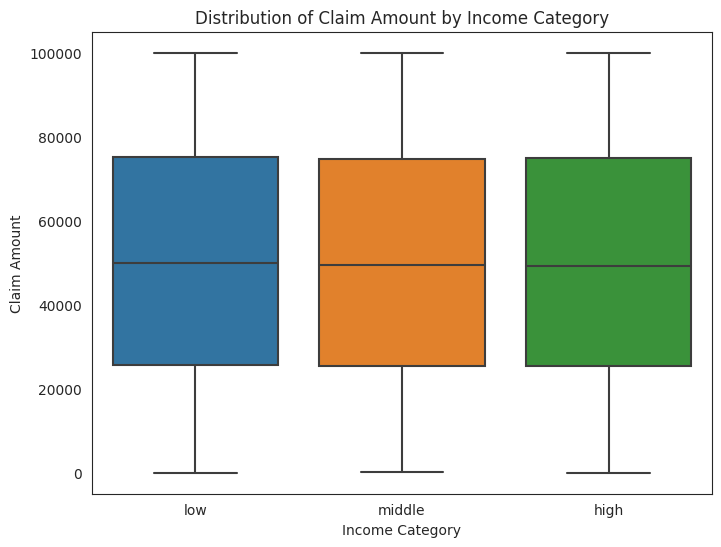

In [ ]:
# To answer this question, we can use ANOVA (Analysis of Variance) 
# to compare averages between these two variables
import statsmodels.api as sm
from statsmodels.formula.api import ols

#income_percentiles = polis['household_income'].quantile([0.25, 0.75])

# Create income segments based on percentile range
#low_income = polis['household_income'] <= income_percentiles[0.25]
#middle_income = (polis['household_income'] > income_percentiles[0.25]) & (polis['household_income'] <= income_percentiles[0.75])
#high_income = polis['household_income'] <= income_percentiles[0.75]

#income_category = pd.concat([polis[low_income]['household_income'],
#                             polis[middle_income]['household_income'],
#                             polis[high_income]['household_income']])
# Mengubah tipe data kolom 'pemasukan rumah tangga' menjadi kategori (low/middle/high)
polis['income_category'] = pd.qcut(polis['household_income'],
                                   q=3,
                                   labels=['low', 'middle', 'high'])

# Membuat model ANOVA
model = ols('claim_amt ~ income_category',
            data=polis).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Menampilkan hasil ANOVA
print(anova_table)

# Membuat boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=polis,
            x='income_category',
            y='claim_amt')
plt.xlabel('Income Category')
plt.ylabel('Claim Amount')
plt.title('Distribution of Claim Amount by Income Category')
plt.show()

1. The p-value (0.66556) obtained is greater than the commonly used significance level (eg 0.05). This shows that there is no significant difference in the average number of claims between income groups (low, middle, high). In this context, there is not enough statistical evidence to support the effect of income levels on the high number of claims reported by customers.

2. The obtained F-statistic value (0.407131) is also not significant, which indicates that the variation in the average number of claims that can be explained by the income_category factor is low.

Based on the results of this ANOVA analysis, there is not enough evidence to state that income levels (low/middle/high-income) affect the high number of claims reported by customers in the dataset.


7. **Is there a relationship or correlation between education level and the number of claims reported? what is the distribution shown between the two variables?**

In [ ]:
edu_claim = polis.drop(['numberID', 'birthdate',
                             'car_use', 'gender',
                             'kids_driving', 'parent',
                             'brand', 'model',
                             'color', 'produce_year',
                             'claim_freq', 'marital_status_new', 'household_income',
                             'covered_area', 'age', 'group_age'], axis=1)

edu_claim['education_level'] = edu_claim['education_level'].replace({'Basic Education': 0, 'Advanced Education': 1})

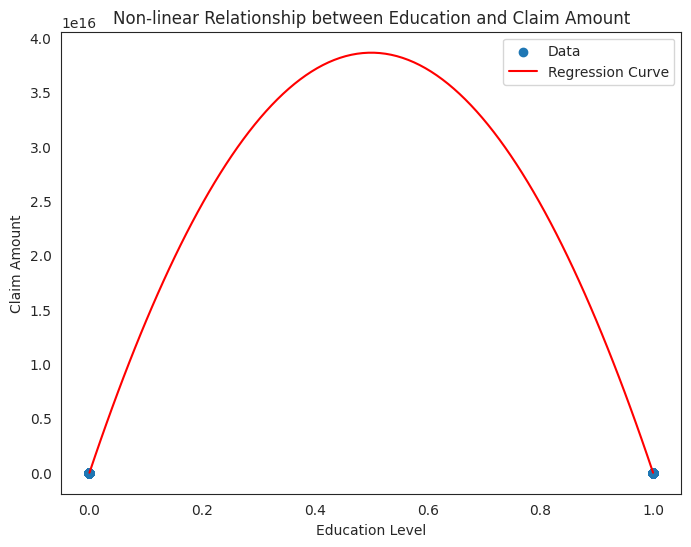

In [ ]:
# Let's try using Non-Linear Regression Modeling
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Memilih variabel pendidikan dan jumlah klaim
X = edu_claim['education_level'].values.reshape(-1, 1)
y = edu_claim['claim_amt'].values

# apply polinomial regression
degree = 2  # polinomial degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Melatih model regresi
model = LinearRegression()
model.fit(X_poly, y)

# Membuat prediksi berdasarkan model
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred = model.predict(X_range_poly)

# Visualisasi hubungan non-linear
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_range, y_pred, color='red', label='Regression Curve')
plt.xlabel('Education Level')
plt.ylabel('Claim Amount')
plt.title('Non-linear Relationship between Education and Claim Amount')
plt.legend()
plt.show()

1. The curved curve shows that the relationship between education level and the number of claims cannot be explained linearly. This means that changes in education levels do not have a direct and proportional impact on the number of claims. For example, an increase in education level does not necessarily mean that the number of claims will increase or decrease consistently. The curve tends to decrease, so this shows a tendency to decrease in the number of claims along with an increase in the level of education.

2. we can identify patterns or trends that might not be apparent through correlation analysis or simple linear regression. This information can provide additional insight that is useful in understanding the factors that affect claim amounts and how these effects change with education level.


8. **Does area coverage affect the level of claims reported by customers? if yes, show the distribution of the relationship that occurs between the 2 variables?**

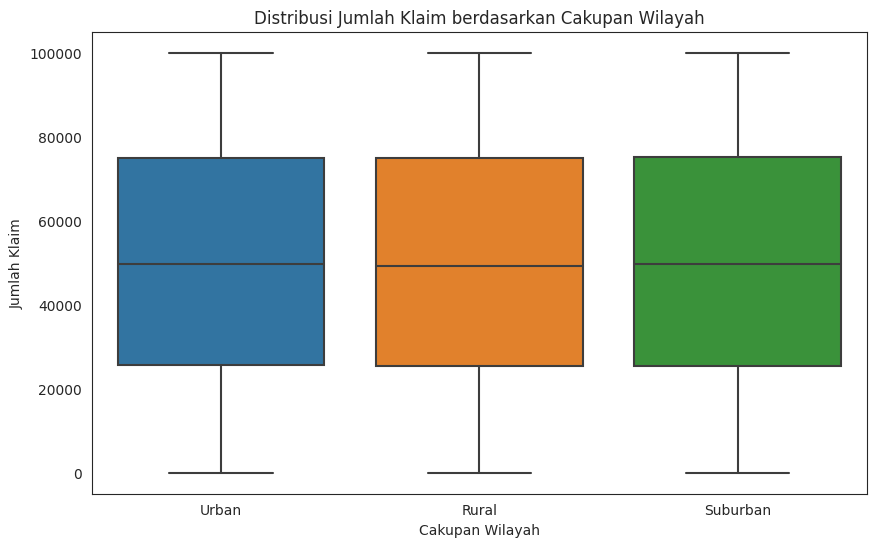

In [ ]:
# Membuat boxplot untuk melihat distribusi jumlah klaim berdasarkan cakupan wilayah
plt.figure(figsize=(10, 6))
sns.boxplot(data=polis, x='covered_area', y='claim_amt')
plt.xlabel('Cakupan Wilayah')
plt.ylabel('Jumlah Klaim')
plt.title('Distribusi Jumlah Klaim berdasarkan Cakupan Wilayah')
plt.show()

In [ ]:
model = ols('claim_amt ~ covered_area', data=polis).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                    sum_sq       df         F    PR(>F)
covered_area  4.949759e+08      2.0  0.300315  0.740587
Residual      3.093570e+13  37539.0       NaN       NaN


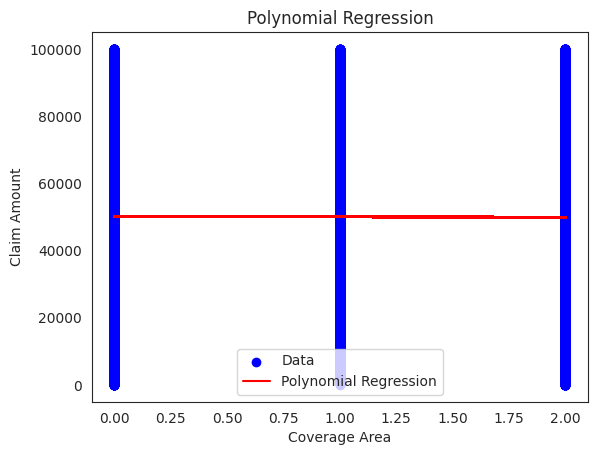

In [ ]:
area = polis.drop(['numberID', 'birthdate',
                             'car_use', 'gender',
                             'kids_driving', 'parent',
                             'brand', 'model',
                             'color', 'produce_year',
                             'claim_freq', 'marital_status_new', 'household_income',
                             'education_level', 'age', 'group_age'], axis=1)

area['covered_area'] = area['covered_area'].replace({'Urban': 0, 'Suburban': 1, 'Rural': 2})

# Mengambil data cakupan wilayah dan tingkat klaim
x = area['covered_area'].values.reshape(-1, 1)
y = area['claim_amt'].values

# Membangun model regresi polinomial
poly_features = PolynomialFeatures(degree=2)  # Sesuaikan derajat polinomial jika diperlukan
x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Memprediksi tingkat klaim dengan menggunakan model regresi polinomial
y_pred = model.predict(x_poly)

# Visualisasi hasil regresi polinomial
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Coverage Area')
plt.ylabel('Claim Amount')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

After performing several analytical methods, it was found that the coverage area has no significant relationship to the number of claims reported by customers.